In [4]:
import numpy as np
import matplotlib.pylab as plt
#%matplotlib notebook
%matplotlib inline

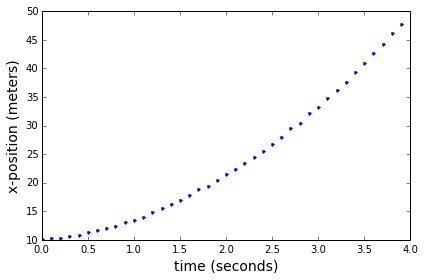

In [5]:
# Let's generate some position points for an object undergoing constant acceleration.
# I'll give it some small random jitter to represent that it is not measured perfectly. 

x0 = 10.0
v0 = 1.5
a = 4.2

# Let's do this in 0.1 second intervals for 4 seconds
t = np.arange(0,4,0.1)

x = x0 + v0*t + (1/2.0)*a*t**2

x += np.random.normal(0.0, 0.1, len(x))

plt.figure(figsize=(6,4))
plt.plot(t,x,'.')
plt.xlabel('time (seconds)',fontsize=14)
plt.ylabel('x-position (meters)',fontsize=14)
plt.tight_layout()

A numerical way to calculate the velocity at any given point is to calculate the *slope* at that point by using the postition *before* and *after* that point. 

$$v_i = \frac{x_{i+1} - x_{i-1}}{t_{i+1} - t_{i-1}}$$

This means that we can't calculate the velocity in the same way for the first and last points, so we can either drop them or estimate them by replacing those calculations with a slightly different and probably less accurate calculation.

$$v_0 = \frac{x_{1} - x_{0}}{t_{1} - t_{0}}$$

and for the last ($N^{th}$) point.

$$v_N = \frac{x_{N} - x_{N-1}}{t_{N} - t_{N-1}}$$

In [6]:
v = np.zeros(len(x))

# Do all the *middle* ones
v[1:-1] = (x[2:] - x[0:-2])/(t[2:] - t[0:-2])

# Do the first point
v[0] = (x[1] - x[0])/(t[1] - t[0])

# Do the last point
v[-1] = (x[-1] - x[-2])/(t[-1] - t[-2])

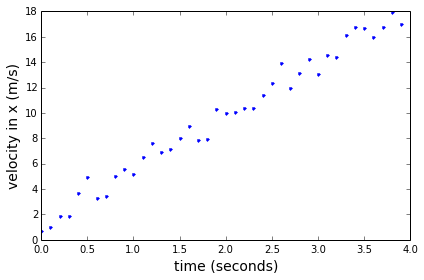

In [7]:
# Plot them!

plt.figure(figsize=(6,4))
plt.plot(t,v,'.')
plt.xlabel('time (seconds)',fontsize=14)
plt.ylabel('velocity in x (m/s)',fontsize=14)
plt.tight_layout()